In [1]:

import torch
from torch import nn
import matplotlib.pyplot as plt




In [2]:
if torch.cuda.is_available():
    device ='cuda'
else:
    device = 'cpu'
device






'cpu'

In [3]:
m=0.7
c=0.3

X=torch.arange(0,1,0.02)
y=m*X+c

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)
print("Type of X = ", type(X))
print("Type of y = ", type(y))

Shape of X =  torch.Size([50])
Shape of y =  torch.Size([50])
Type of X =  <class 'torch.Tensor'>
Type of y =  <class 'torch.Tensor'>


In [4]:
split = int(0.8*len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([40]) torch.Size([40])
torch.Size([10]) torch.Size([10])


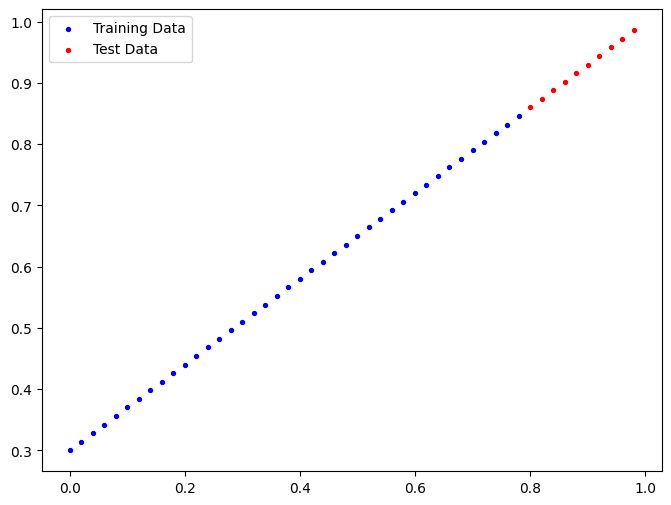

In [5]:
def plot_data(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, c='b', s=8, label='Training Data')
    plt.scatter(X_test, y_test, c='r', s=8, label='Test Data')
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', label='Predicted data')
    plt.legend()


plot_data()

In [6]:
class FirstNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(
            1, dtype=torch.float, requires_grad=True))
        
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

In [7]:
torch.manual_seed(42)
model_0 = FirstNeuralNetwork()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

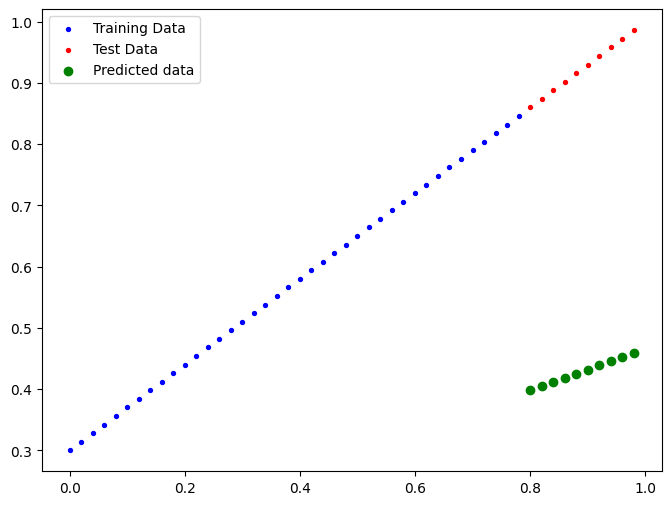

In [8]:
#Get the predictions switch the model to inference mode
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_data(predictions = y_preds)

In [9]:
loss_fn  =nn.MSELoss()


optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)



In [10]:
model_0.to(device)

FirstNeuralNetwork()

In [11]:
#set up the training loop

epochs = 500
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
trainLossList = []
testLossList = []

for epoch in range(epochs):
    model_0.train()

    #forward pass
    train_pred = model_0(X_train)

    #Compute training loss
    train_loss = loss_fn(y_train, train_pred)

    #Zero grad optimizer
    optimizer.zero_grad()

    #Back Propagation
    train_loss.backward()

    #step the optimizer
    optimizer.step()
    
    #testing
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(y_test, test_pred)

    if epoch%10==0:
        print(f"Epoch:{epoch}|Train Loss:{train_loss:.5f}|Test Loss:{test_loss:.5f}")

    trainLossList.append(train_loss)
    testLossList.append(test_loss)

Epoch:0|Train Loss:0.10493|Test Loss:0.16585
Epoch:10|Train Loss:0.00334|Test Loss:0.01702
Epoch:20|Train Loss:0.00234|Test Loss:0.01036
Epoch:30|Train Loss:0.00195|Test Loss:0.00839
Epoch:40|Train Loss:0.00162|Test Loss:0.00696
Epoch:50|Train Loss:0.00135|Test Loss:0.00578
Epoch:60|Train Loss:0.00112|Test Loss:0.00481
Epoch:70|Train Loss:0.00093|Test Loss:0.00400
Epoch:80|Train Loss:0.00077|Test Loss:0.00332
Epoch:90|Train Loss:0.00064|Test Loss:0.00276
Epoch:100|Train Loss:0.00053|Test Loss:0.00230
Epoch:110|Train Loss:0.00044|Test Loss:0.00191
Epoch:120|Train Loss:0.00037|Test Loss:0.00159
Epoch:130|Train Loss:0.00031|Test Loss:0.00132
Epoch:140|Train Loss:0.00026|Test Loss:0.00110
Epoch:150|Train Loss:0.00021|Test Loss:0.00091
Epoch:160|Train Loss:0.00018|Test Loss:0.00076
Epoch:170|Train Loss:0.00015|Test Loss:0.00063
Epoch:180|Train Loss:0.00012|Test Loss:0.00052
Epoch:190|Train Loss:0.00010|Test Loss:0.00044
Epoch:200|Train Loss:0.00008|Test Loss:0.00036
Epoch:210|Train Loss:0.0